# Hoán chuyển số liệu: đại lượng, biến và thang đo

### BS. Lê Ngọc Khả Nhi
### 09/03/2019

### Giới thiệu

Hoán chuyển số liệu là một thao tác phổ biến mà chắc chắn mỗi người trong chúng ta đều đã từng áp dụng khi làm nghiên cứu, thậm chí khi chúng ta không ý thức về mục đích. Không phải chỉ mới thời gian gần đây khi Machine learning trở nên phổ biến thì người ta mới nói về Hoán chuyển dữ liệu trong các chuyên đề như Data wrangling, feature engineering..., mà ở quá khứ  hoán chuyển dữ liệu vẫn luôn được thực hành trong thống kê quy ước. 

Hầu hết những tài liệu về chủ đề này chỉ mới trình bày về kỹ thuật, nhưng chưa giải thích được bản chất và ý nghĩa của những kỹ thuật này. Do đó, người học tuy biết cách làm, nhưng không hiểu được khi nào cần can thiệp lên dữ liệu ? Vì sao phải can thiệp ? Những hệ quả của việc can thiệp là gì ?

Trong bài thực hành ngắn này, Nhi sẽ trình bày trực quan về một số khái niệm như Đại lượng, Biến số và thang đo. Chúng cho phép người học nhìn ra bản chất, ý nghĩa của các quy trình hoán chuyển số liệu và áp dụng phù hợp trong công việc hằng ngày.

Chúng ta sẽ làm việc tên một dữ liệu có thực: "Medical Expenses in Viet–nam", một nghiên cứu cắt ngang do World Bank thực hiện vào năm 1997, khảo sát mức chi tiêu cho Y tế của 5999 hộ gia đình tại Việt Nam. Ta dùng pandas tải dữ liệu này về :

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/VietNamH.csv", index_col=0)

df.head()

,sex,age,educyr,farm,urban,hhsize,lntotal,lnmed,lnrlfood,lnexp12m,commune
1,female,68,4.0,no,yes,6,10.13649,11.233210,8.639339,11.233210,1
2,female,57,8.0,no,yes,6,10.25206,8.505120,9.345752,8.505120,1
3,male,42,14.0,no,yes,6,10.93231,8.713418,10.226330,8.713418,1
4,female,72,9.0,no,yes,6,10.26749,9.291736,9.263722,9.291736,1
5,female,73,1.0,no,yes,8,10.48811,7.555382,9.592890,7.555382,1


Lúc này, những gì bạn nhìn thấy trong dữ liệu là giá trị các đại lượng (con số), hoặc thuộc tính (nhãn). Trong bài này, Nhi chỉ tập trung bàn về đại lượng (dữ liệu số). 

Nhi khuyến khích các bạn nên phân biệt giữa 2 khái niệm: đại lượng/thực thể (quantity, entity) và biến số (variable). Điều này sẽ phân biệt giữa người nghiên cứu khoa học và người "thợ thống kê". Khác với biến số hay con số, đại lượng hay thực thể có ý nghĩa, là kết quả của phép đo, đếm, thí nghiệm, đơn vị và thang đo xác định. Thí dụ: "age" là tuổi của chủ hộ được khảo sát, có bản chất là thời gian, nhận giá trị là con số thực, không âm. Tuổi gắn với nhiều thuộc tính khác cho phép mô tả một con người. Có thể đo tuổi bằng nhiều đơn vị: năm, tháng, ngày... Cũng có thể phân nhóm, thí dụ: trẻ em, thiếu niên, trung niên, người già ... 

Chuyên viên thống kê nhìn đại lượng tuổi như một biến số và mô tả nó bằng các đặc tính: biến liên tục, giá trị trong khoảng 0 đến dương vô cùng (tập R+), đơn vị đo là năm ..., rồi họ xét đặc tính phân bố của biến age, và dùng nó trong một mô hình như features (predictor) hay outcome nhằm tiên lượng hay suy diễn thống kê. 

Càng đi sâu vào kỹ thuật, chúng ta càng rời xa thế giới thực và ý nghĩa khoa học. Những người theo phái Data science nhìn mọi sự vật bằng con mắt kỹ thuật, họ sẽ nhìn thấy arrays, matrices, vectors, những con số. Cái máy tính cũng vậy, nó không quan tâm đến ý nghĩa hay đơn vị của con số.

Một điều chắc chắn, đó là khi chưa có mục tiêu nghiên cứu rõ ràng, ta sẽ không có nhu cầu hoán chuyển dữ liệu. Cũng giống như   bạn sẽ không đặt vấn đề sơ chế nguyên liệu hay chuẩn bị gia vị một khi chưa biết mình sẽ nấu món ăn gì. Hoán chuyển là giải pháp kỹ thuật để gắn kết dữ liệu, mô hình và mục tiêu nghiên cứu. Chúng ta cần suy nghĩ như một khoa học gia, nhưng hành động như một người thợ thống kê, đi theo quy trình: Xác định mục tiêu, xác định mô hình (công cụ), và cuối cùng là thích nghi dữ liệu với loại mô hình đó. 

Thí dụ, mục tiêu nghiên cứu là so sánh nồng độ cholesterol giữa nhóm bệnh và nhóm chứng, ta chọn Student's t test làm công cụ, bản chất của test này là một mô hình tuyến tính: Y ~ phân nhóm X. Lúc này đại lượng Cholesterol trở thành một biến số (liên tục) và mô hình nhằm ước lượng giá trị Y dựa trên giả định là Y có phân bố chuẩn. Nhưng ta khảo sát và thấy giả định này bị vi phạm, lúc này ta phải hoán chuyển Y thành Y' sao cho Y' có phân bố chuẩn. Lúc này chỉ còn là vấn đề kỹ thuật.

Nghĩ theo cách này, ta sẽ nhận ra là hoán chuyển không phải là một điều bắt buộc, mà chỉ là giải pháp bất đắc dĩ. Phương pháp hoán chuyển tùy thuộc vào loại mô hình : nếu bạn chọn một mô hình cây hay random forest, bạn không cần hoán chuyển features, vì thang đo outcome không còn gắn với thang đo features bằng 1 hàm tuyến tính; nhưng nếu bạn dùng linear regression hay neural network thì phải hoán chuyển features. Tương tự cho bài toán ở trên, thay vì chọn t test, bạn có thể dùng một mô hình GLM với phân bố lognormal hay gamma, thì không cần hoán chuyển Y bằng hàm log nữa.

Trở lại với biến "age" trong dữ liệu, ta thử khảo sát về phân bố của nó bằng histogram: 

<IPython.core.display.Javascript object>


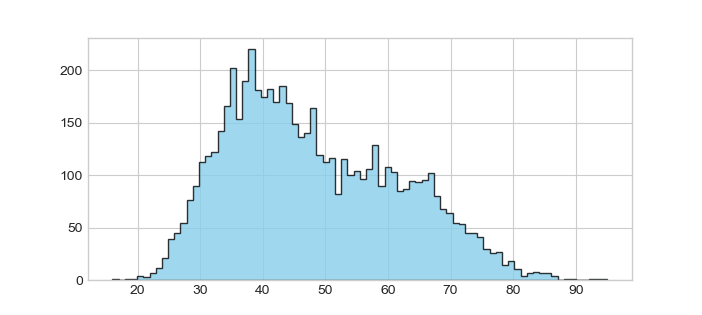

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
sns.set_style('whitegrid')

df['age'].hist(bins=80,histtype='stepfilled',color='skyblue',edgecolor='black',alpha=0.8)

Trục hoành của histogram chính là thang đo của biến số Age, một thang đo liên tục, bằng thống kê mô tả, ta có thể biết giới hạn của thang đo là 16 đến 95 tuổi và vị trí trung tâm là 46 tuổi. Một phân bố không chuẩn ?

In [50]:
df['age'].describe()

count    5999.000000
mean       48.012835
std        13.770205
min        16.000000
25%        37.000000
50%        46.000000
75%        58.000000
max        95.000000
Name: age, dtype: float64

Ta có thể hoán chuyển thang đo liên tục này thành thang đo rời rạc, thí dụ 10 mức tuổi khác nhau: lúc này biến age trở thành một categorical hay discrete variable:

In [17]:
age_10 = np.floor_divide(df['age'], 10)

age_10.unique()

array([6, 5, 4, 7, 8, 3, 2, 9, 1], dtype=int64)

<IPython.core.display.Javascript object>


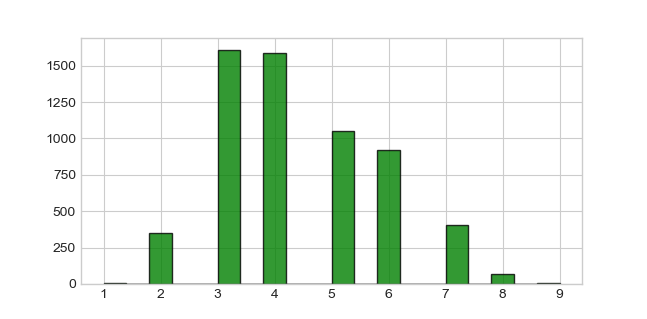

In [18]:
age_10.hist(bins=20,histtype='stepfilled',color='green',edgecolor='black',alpha=0.8)

Kernel density estimation (KDE) plot là một cách khác để khảo sát phân phối của age:

<IPython.core.display.Javascript object>


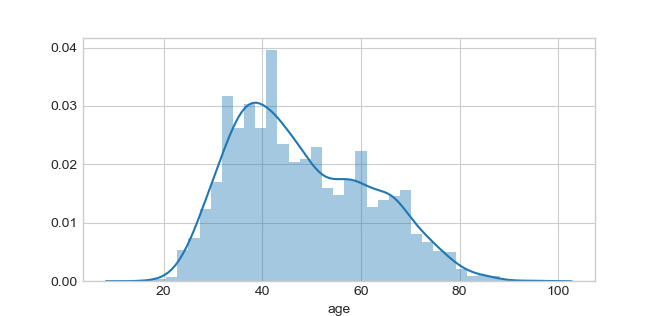

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [45]:
sns.distplot(df['age'])

Có một kỹ thuật hoán chuyển phổ biến trong phân tích hồi quy của thống kê cổ điển, đó là centering (dịch chuyển về trung bình), có thể áp dụng cho cả Y và X, ý nghĩa của việc làm này là để suy diễn effect size chính xác hơn trong mô hình tuyến tính. Nó không thay đổi phân bố của biến Y hoặc X, nhưng dời vị trí trung bình về vị trí 0. Như vậy age bị kéo hoàn toàn về bên trái và có một thang đo mới nhưng đơn vị không đổi, vẫn là "năm".

<IPython.core.display.Javascript object>


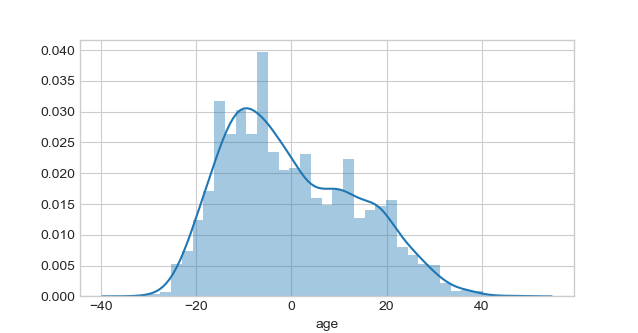

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [42]:
sns.distplot(df['age'] - np.mean(df['age']))

Hai phương pháp hoán chuyển khác là chuẩn hóa (standardization) và đưa về thang đo giới hạn 0:1. Chúng thường được áp dụng cho features (X) và giải quyết vấn đề dữ liệu bị phân tán, rời rạc. Cả hai làm thay đổi thang đo, đơn vị đo, và đặc tính phân bố. Tuy nhiên biến age trong dữ liệu này không có vấn đề dữ liệu rời rạc, nên hình ảnh phân bố không cho thấy khác biệt rõ rệt giữa trước và sau hoán chuyển:

In [47]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

age_minmax = MinMaxScaler().fit_transform(df['age'].values.reshape(-1, 1))
age_std = StandardScaler().fit_transform(df['age'].values.reshape(-1, 1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


<IPython.core.display.Javascript object>


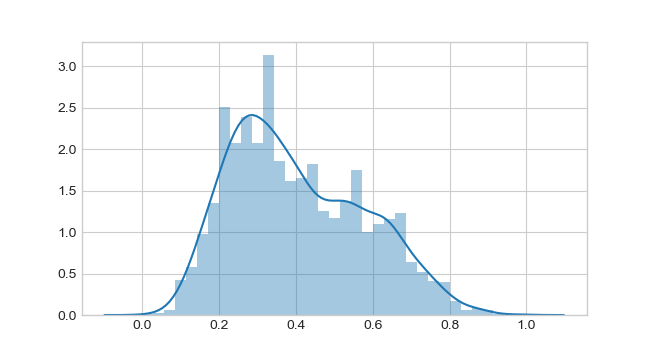

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [48]:
sns.distplot(age_minmax)

<IPython.core.display.Javascript object>


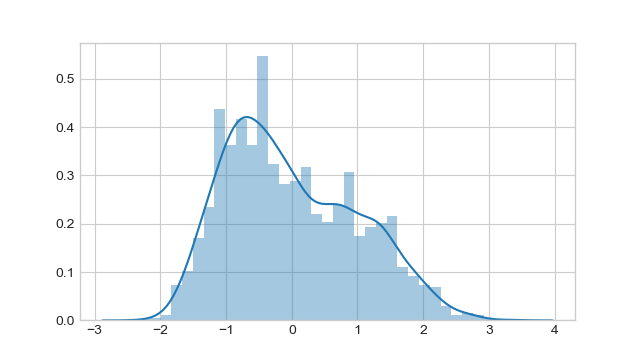

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [49]:
sns.distplot(age_std)

Trong khi đó, nếu ta dùng hàm logarithm cho age, ta sẽ có một phân bố khác, gần với phân bố chuẩn. Hàm log cũng làm thay đổi cả về bản chất, thang đo và đơn vị của age. Hoán chuyển bằng hàm log là một thủ thuật máy móc trong thống kê cổ điển để giải quyết vi phạm giả định của các test, mô hình. Phần tiếp theo Nhi sẽ giải thích về cách làm này.

<IPython.core.display.Javascript object>


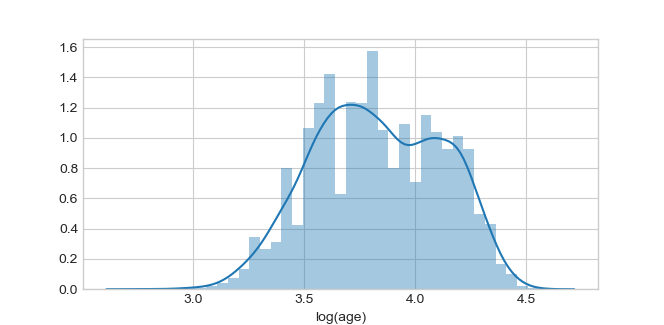

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [36]:
sns.distplot(np.log(df['age']),axlabel="log(age)")

Trong dữ liệu này, có 3 đại lượng là lntotal, lnmed, lnrlfood tương ứng với tổng thu nhập, chi tiêu y tế và chi tiêu thực phẩm, nhưng với thang đo logarithm (chúng đã bị hoán chuyển bằng hàm log). Tại sao người ta làm như vậy ? Để hiểu điều này trước hết ta làm thí nghiệm minh họa sau đây: 

Chi một biến số x với thang đo từ 0 đến 100, ta lần lượt áp dụng 4 hàm hoán chuyển lên X và khảo sát hệ quả của chúng:

<IPython.core.display.Javascript object>


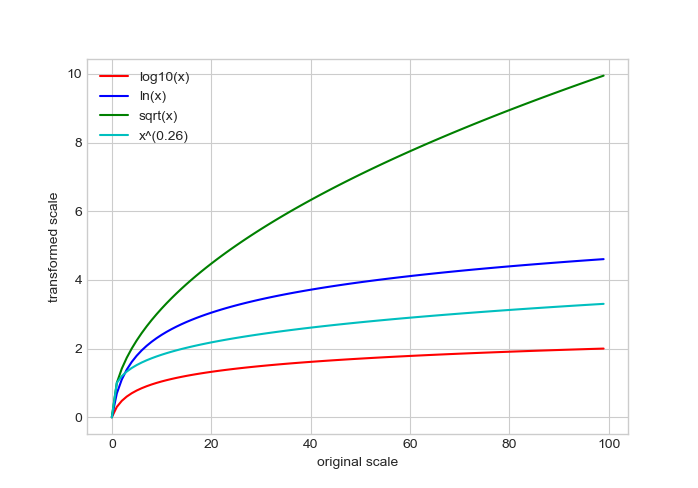

Text(0,0.5,'transformed scale')

In [32]:
x = np.arange(0,100,1)
y1 = np.log10(x+1)
y2 = np.log(x+1)
y3 = np.sqrt(x)
y4 = x**(0.26)

fig, ax = plt.subplots()
plt.plot(x, y1, 'r')
plt.plot(x, y2, 'b')
plt.plot(x, y3, 'g')
plt.plot(x, y4, 'c')

plt.legend(['log10(x)', 'ln(x)', 'sqrt(x)','x^(0.26)'], 
           loc='upper left')
ax.tick_params(labelsize=10)
ax.set_xlabel('original scale', fontsize=10)
ax.set_ylabel('transformed scale', fontsize=10)

Hình vẽ cho ta thấy, hàm log(x), ln(x) biến đổi thang đo của x bằng hiệu ứng: phóng đại những sự biến đổi rất nhỏ (vùng giá trị từ 0 đến 20, nhưng thu hẹp những biến đổi rất lớn (từ 60 trở lên) của X. Hiệu ứng này cực kì hữu ích khi X là predictor (feature) trong một mô hình mà giá trị outcome Y trực tiếp tỉ lệ với sự thay đổi của X (hồi quy tuyến tính, KNN, neural network...). 

Bạn cũng chú ý một chi tiết : X được + 1 trước khi áp dụng hàm log, đây là một giải pháp kỹ thuật, vì 2 mục tiêu: giải quyết vấn đề: ta không thể tính được log khi X=0, và: nếu ta cộng thêm một giá trị <1, thang đo của X' sau hoán chuyển sẽ có giá trị âm, nhưng nếu +1, thang đo mới sẽ giới hạn ở Xmin = 0.

Nhưng hàm log không phải là cách duy nhất tạo ra hiệu ứng nói trên (ổn định thang đo của X). Nếu ta áp cụng một hàm Power nào khác, thí dụ căn bậc 2, X^(0.26) , ta cũng sẽ có hiệu ứng tương tự.

Tiếp theo, ta sẽ phục hồi lại đại lượng Chi tiêu cho y tế cho hộ gia đình mỗi tháng, bằng cách áp dụng hàm Exponential cho biến lnmed, lúc này ta sẽ nhận ra sự thật về sự mất cân bằng khủng khiếp trong phân phối của đại lượng này:

In [52]:
df['Medcost'] = round(np.exp(df['lnmed']),0)-1

In [53]:
df['Medcost'].describe()

count      5999.000000
mean       1519.293049
std        5139.822579
min           0.000000
25%          64.000000
50%         389.000000
75%        1312.000000
max      234040.000000
Name: Medcost, dtype: float64

<IPython.core.display.Javascript object>


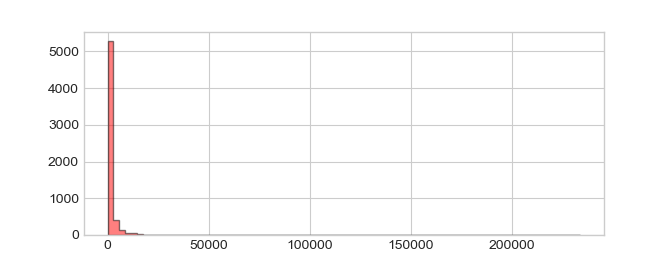

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
sns.set_style('whitegrid')

df['Medcost'].hist(bins=80,histtype='stepfilled',color='red',edgecolor='black',alpha=0.5)

Đây là hình ảnh chung của tất cả những đại lượng liên quan đến con số đếm trong cuộc sống, từ tài sản, thu nhập, chi tiêu, cho đến số lượng tế bào máu, số lần dùng thuốc, tần suất sự kiện... , chúng đều phân bố lệch. 

Sau khi hoán chuyển bằng hàm log cho ta phân bố có hình ảnh khá "chuẩn", do đó sinh viên thường được dạy về cách chuẩn hóa bằng hàm log trong thống kê thực hành.

Chú ý: việc hoán chuyển bằng hàm log làm thay đổi cả về bản chất lẫn thang đo của một đại lượng, chứ không phải chỉ có đơn vị thang đo. Nếu ta chỉ đổi đơn vị từ VND thành log(VND) thì không làm thay đổi phân bố, như hình sau đây cho thấy: 

<IPython.core.display.Javascript object>


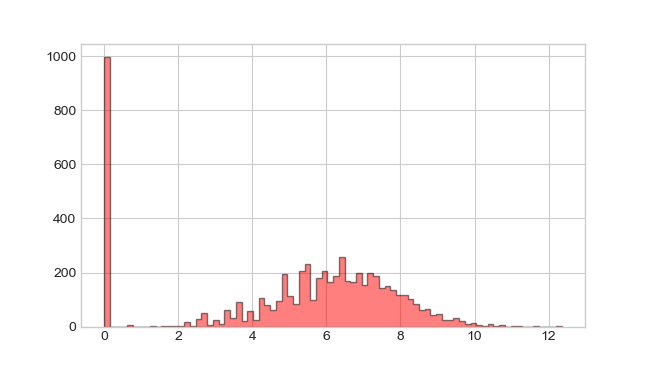

In [56]:
df['lnmed'].hist(bins=80,histtype='stepfilled',color='red',edgecolor='black',alpha=0.5)

Để hình dung về khác biệt giữa đại lượng và con số vô nghĩa, Nhi tạo ra một biến mới là tỉ số giữa tổng chi tiêu cho y tế và tổng thu nhập của hộ gia đình. Khi thực hiện phép chia này, kết quả chỉ là 1 con số (tỉ số), nhưng con số này cho ta biết gánh nặng về chi phí y tế mà người Việt Nam phải chịu vào năm 1997. 

In [57]:
df['Total'] = round(np.exp(df['lntotal']+1),0)

df['Ratio'] = df['Medcost']/df['Total']

df['Ratio'].describe()

count    5999.000000
mean        0.040631
std         0.091621
min         0.000000
25%         0.002095
50%         0.013252
75%         0.041891
max         2.630343
Name: Ratio, dtype: float64

Một lần nữa, ta có thể hoán chuyển biến Ratio này thành thang đo rời rạc, thí dụ phân chia theo bách phân vị:

In [59]:
quant = df['Ratio'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9, .95, .99])

quant

0.10    0.000000
0.20    0.000760
0.30    0.003763
0.40    0.007788
0.50    0.013252
0.60    0.020824
0.70    0.033141
0.80    0.054256
0.90    0.097846
0.95    0.163685
0.99    0.427919
Name: Ratio, dtype: float64

<IPython.core.display.Javascript object>


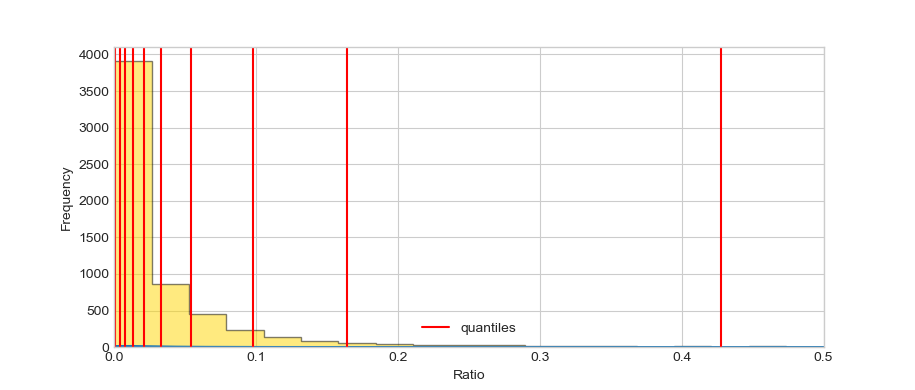

Text(0,0.5,'Frequency')

In [62]:
fig, ax = plt.subplots()
df['Ratio'].hist(ax=ax,bins=100,
                 histtype='stepfilled',
                 color='gold',
                 edgecolor='black',
                 alpha=0.5)
df['Ratio'].plot.kde(ax=ax, legend=False)
for q in quant:
    handle = plt.axvline(q, color='r')
ax.legend([handle], ['quantiles'], fontsize=10)
ax.tick_params(labelsize=10)
ax.set_xlim(0,0.5)
ax.set_xlabel('Ratio', fontsize=10)
ax.set_ylabel('Frequency', fontsize=10)

Tiếp theo, ta sẽ thử 2 phương pháp hoán chuyển khác có tác dụng tương tự như hàm log, để đưa phân bố của Ratio là một biến phân bố rất lệch về phân phối chuẩn, đó là hoán chuyển Box-Cox và Yeo-Johnson. 

Hình vẽ sau đây trình bày hệ quả của hoán chuyển Box-Cox ở các tham số Lambda khác nhau: Lưu ý khi lambda = 0 thì hoán chuyển Box-Cox tương đương với hàm logarithm.

<IPython.core.display.Javascript object>


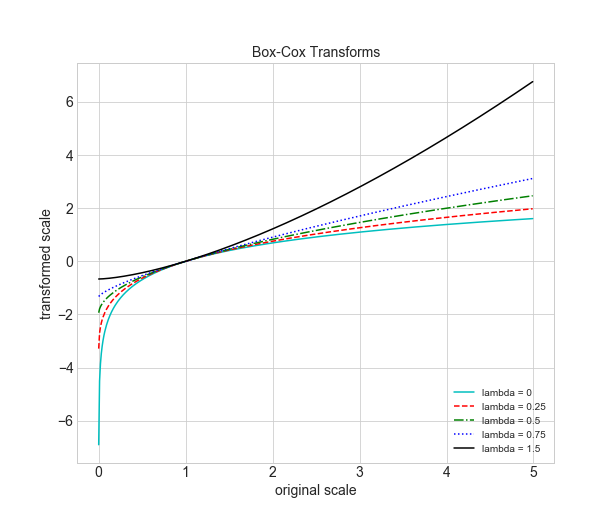

Text(0.5,1,'Box-Cox Transforms')

In [175]:
x = np.arange(0.001, 5, 0.01)
lambda0 = np.log(x)
one_quarter = (x**0.25 - 1)/0.25
square_root = (x**0.5 - 1)/0.5
three_quarters = (x**0.75 - 1)/0.75
one_point_five = (x**1.5 - 1)/1.5

fig, ax = plt.subplots()
plt.plot(x, lambda0, 'c', 
         x, one_quarter, 'r--', 
         x, square_root, 'g-.', 
         x, three_quarters, 'b:',
         x, one_point_five, 'k')
plt.legend(['lambda = 0', 'lambda = 0.25', 'lambda = 0.5', 'lambda = 0.75', 'lambda = 1.5'], 
           loc='lower right')
ax.tick_params(labelsize=14)
ax.set_xlabel('original scale', fontsize=14)
ax.set_ylabel('transformed scale', fontsize=14)
ax.set_title('Box-Cox Transforms', fontsize=14)

Ta sẽ so sánh hệ quả của hoán chuyển logarithm và Box-Cox như sau:

In [63]:
from scipy import stats

ratio_log = stats.boxcox(df['Ratio']+0.000001, lmbda=0)

ratio_bc, bc_lmbda = stats.boxcox(df['Ratio']+0.000001)

bc_lmbda

0.19100032836890868

<IPython.core.display.Javascript object>


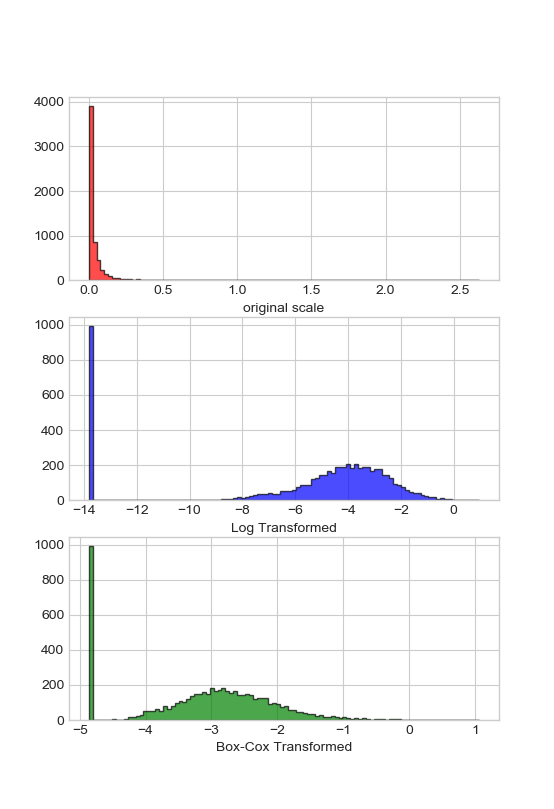

Text(0.5,0,'Box-Cox Transformed')

In [64]:
df['log_ratio']=ratio_log
df['bc_ratio']=ratio_bc
df['bc_ratio2']=ratio_bc

fig, (ax1, ax2, ax3) = plt.subplots(3,1)
# original review count histogram
df['Ratio'].hist(ax=ax1,bins=100,histtype='stepfilled',color='red',edgecolor='black',alpha=0.7)
ax1.set_xlabel('original scale')
# log transform
df['log_ratio'].hist(ax=ax2,bins=100,histtype='stepfilled',color='blue',edgecolor='black',alpha=0.7)
ax2.set_xlabel('Log Transformed')
# Box-cox
df['bc_ratio'].hist(ax=ax3,bins=100,histtype='stepfilled',color='green',edgecolor='black',alpha=0.7)
ax3.set_xlabel('Box-Cox Transformed')

Hoán chuyển Yeo-Johnson có ưu thế hơn vì nó áp dụng được cho cả trường hợp X có giá trị âm: 

In [133]:
from sklearn.preprocessing import PowerTransformer

In [148]:
bc_tfm_std = PowerTransformer(method='box-cox',standardize=True)
bc_tfm = PowerTransformer(method='box-cox',standardize=False)
yj_tfm_std = PowerTransformer(method='yeo-johnson',standardize=True)
yj_tfm = PowerTransformer(method='yeo-johnson',standardize=False)

In [146]:
df['Ratio'].values.reshape(-1, 1)+0.000001

array([[2.99437657e+00],
       [1.74277641e-01],
       [1.08715301e-01],
       ...,
       [3.23442022e-01],
       [3.07658074e-02],
       [1.00000000e-06]])

In [149]:
ratio_bc2 = bc_tfm_std.fit_transform(df['Ratio'].values.reshape(-1, 1)+0.000001)
ratio_bc3 = bc_tfm.fit_transform(df['Ratio'].values.reshape(-1, 1)+0.000001)
ratio_yj1 = yj_tfm_std.fit_transform(df['Ratio'].values.reshape(-1, 1))
ratio_yj2 = yj_tfm.fit_transform(df['Ratio'].values.reshape(-1, 1))

<IPython.core.display.Javascript object>


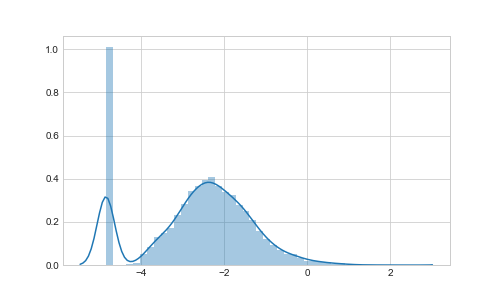

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [163]:
sns.distplot(ratio_bc)

<IPython.core.display.Javascript object>


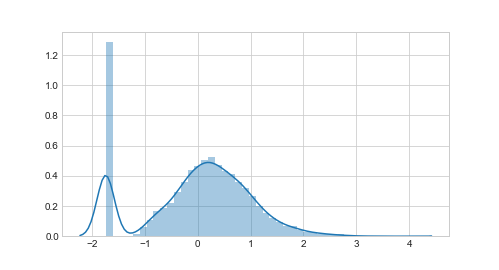

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [164]:
sns.distplot(ratio_bc2)

<IPython.core.display.Javascript object>


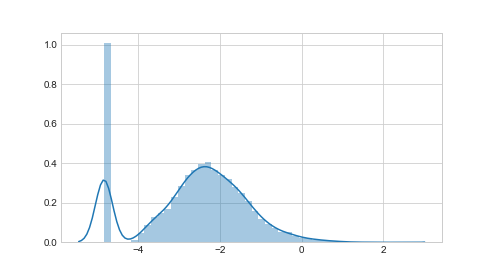

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [165]:
sns.distplot(ratio_bc3)

<IPython.core.display.Javascript object>


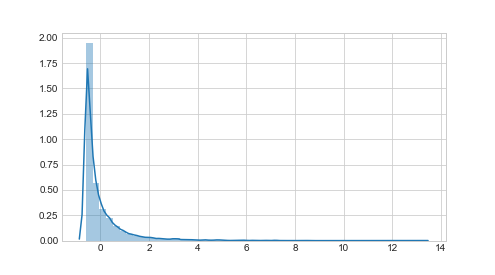

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [166]:
sns.distplot(ratio_yj1)

<IPython.core.display.Javascript object>


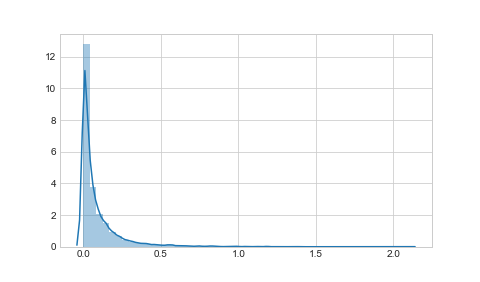

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [171]:
sns.distplot(ratio_yj2)

Cuối cùng, Nhi sẽ hoàn tất việc hoán chuyển từ biến rời rạc thành dummy variable bằng kỹ thuật Onehot coding. Trong dữ liệu này, Số nhân khẩu trong hộ gia đình là một biến số rời rạc, ta có thể chuyển nó thành categorical variable, sau đó áp dụng Onehot coding để tạo ra một matrix với giá trị 0 và 1 cho mỗi kích cỡ của hộ gia đình từ 1 - 13 người.

<IPython.core.display.Javascript object>


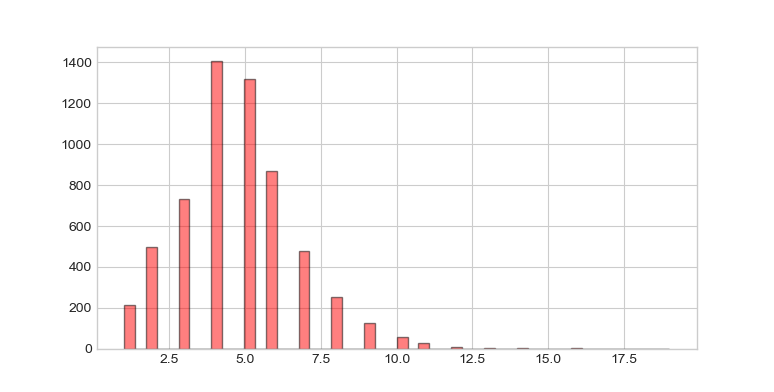

In [66]:
df['hhsize'].hist(bins=50,histtype='stepfilled',color='red',edgecolor='black',alpha=0.5)

In [208]:
df['hhsize']=df['hhsize'].astype(object)

df['hhsize'].unique()

array([6, 8, 7, 9, 4, 5, 3, 2, 1, 10, 19, 11, 12, 14, 16, 13],
      dtype=object)

In [225]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

hh_dum = enc.fit_transform(df['hhsize'].values.reshape(-1, 1)).toarray()

hh_dum[:5,]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

# Tổng kết

Bài thực hành đến đây là hết, thông điệp quan trọng mà Nhi muốn gửi, không phải là những kỹ thuật transformation, nhưng là khuyến khích các bạn suy nghĩ cẩn thận hơn về dữ liệu và thang đo của chúng trước khi quyết định can thiệp bằng các giải pháp kỹ thuật thay vì làm việc máy móc theo công thức, thói quen.

Tạm biệt các bạn.